# Expand AI Assignment (computer vision)


\
## Problem 1 
## Task: Chest X-Ray images play a vital role in the diagnosis of diseases. In this assignment, you will be in-charge of the task of Chest X-Ray Classification into 3 categories Covid, Normal, and Pneumonia.
\

The provided data was in mixed format and there was no folder wise sepratation between the classes so I created 3 folders and divided 300 images per folder 


### Mounting drive for data loading

In [17]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Loading the dependencies

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import models,layers
from tensorflow import keras
from sklearn.metrics import f1_score
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications import resnet50

# from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from sklearn.metrics import classification_report
# from tensorflow.keras import layers
print("D o n e")

D o n e


In [ ]:
# from tensorflow import keras
# from tensorflow.keras import layers

### Making constants

In [3]:
BATCH_SIZE = 32
IMAGE_SIZE = 224
CHANNELS=3
EPOCHS=50

### Loading the image file in colab with tf.keras

In [13]:
data =tf.keras.preprocessing.image_dataset_from_directory(
    r'/content/drive/MyDrive/Expand AI Machine Learning Assignment/Computer Vision/diseases/train',
    shuffle = True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = (BATCH_SIZE))

Found 60 files belonging to 3 classes.


In [14]:
class_names = data.class_names
class_names

['Covid', 'normal', 'pneumonia ']

In [15]:
# Printing some details of dataset
for image_batch, labels_batch in data.take(1):
    print('batch_size,dimensions,channels:',image_batch.shape)
    print('labels:',labels_batch.numpy())

batch_size,dimensions,channels: (32, 224, 224, 3)
labels: [0 1 2 0 0 1 2 0 2 2 2 1 2 2 1 1 0 0 1 1 0 0 1 1 1 2 1 0 1 1 2 1]


In [ ]:
for image_batch, labels_batch in data.take(1):
    print(image_batch[0].numpy())

In [21]:
'labels:',labels_batch[0].numpy()

('labels:', 0)

<Figure size 800x800 with 0 Axes>

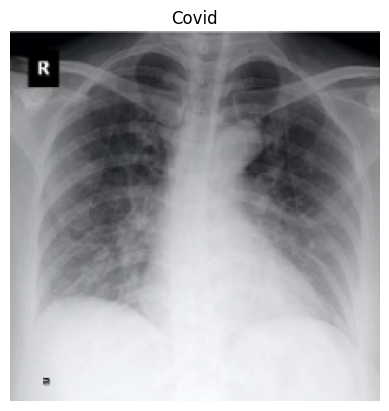

<Figure size 800x800 with 0 Axes>

In [35]:
plt.imshow(image_batch[0].numpy().astype("uint8"))
plt.axis("off")
class_ =class_names[0]
plt.title(class_)
plt.figure(figsize=(8,8))

### Visualizing the classes

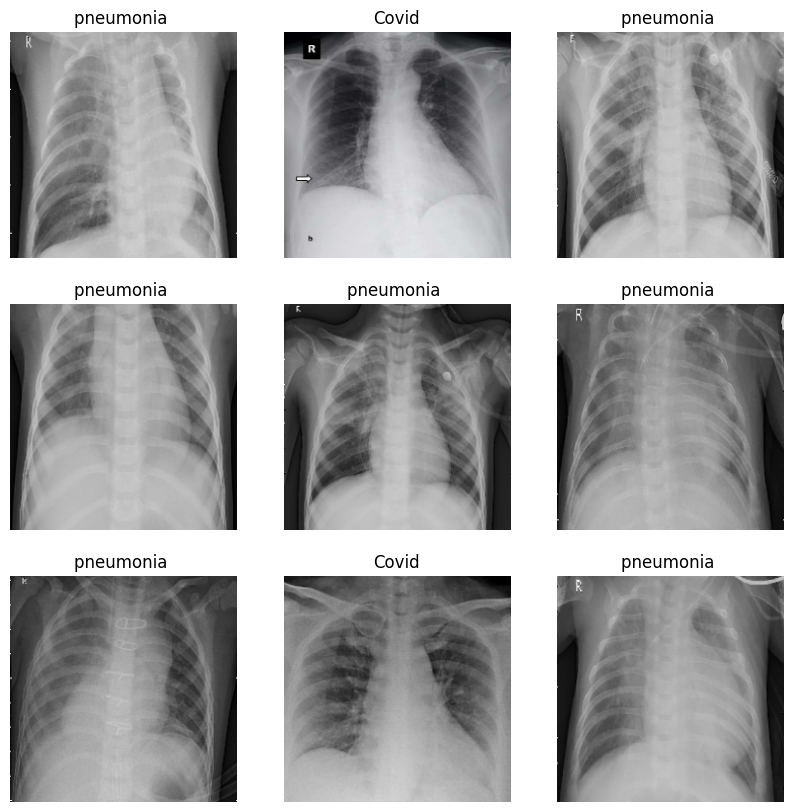

In [36]:
plt.figure(figsize=(10,10))
for image_batch, labels_batch in data.take(1):
    for i in range(9):
      ax = plt.subplot(3,3,i+1)
      plt.imshow(image_batch[i].numpy().astype("uint8"))
      plt.title(class_names[labels_batch[i]])
      plt.axis("off")

### Train_Test_Split

In [ ]:
len(data)

29

In [ ]:
32

464

In [ ]:
train_size = 0.8
len(data)*train_size

23.200000000000003

In [ ]:
train_ds = data.take(23)
len(train_ds)

23

In [ ]:
test_ds = data.skip(23)
len(test_ds)

6

In [ ]:
val_size = 0.1
len(data)*val_size

2.9000000000000004

In [ ]:
#val_ds = test_ds.take(7)
#len(val_ds)

In [ ]:
val_ds = test_ds.take(3)
len(val_ds)

3

In [ ]:
test_ds = test_ds.skip(3)
len(test_ds)

3

### Partitioning the data

Here we are writing a function that splits the data into trainig, testing and 

In [ ]:
def get_dataset_partitions_tf(ds,train_split=0.8,val_split=0.1,test_split=0.1,shuffle=True,shuffle_size=10000):

  ds_size = len(ds)
  
  if shuffle:
    ds = ds.shuffle(shuffle_size, seed=12)
  
  train_size = int(train_split*ds_size)
  val_size = int(val_split*ds_size)

  train_ds = ds.take(train_size)

  val_ds = ds.skip(train_size).take(val_size)
  test_ds = ds.skip(train_size).skip(val_size)
  
  return train_ds,val_ds,test_ds

In [ ]:
train_ds,val_ds,test_ds = get_dataset_partitions_tf(data)

In [ ]:
len(train_ds)

23

In [ ]:
len(val_ds)

2

In [ ]:
len(test_ds)

4

### Cache, Shuffle, and Prefetch the Dataset

We use Cache, Shuffle and Prefetch techniques to optimize data pipeline and speed up the model training process

In [ ]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
print('done')

done


### Model Building 

In [ ]:
resize_and_rescale=tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
  layers.experimental.preprocessing.Rescaling(1./255),])

In [ ]:
data_augmentation=tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),])

In [ ]:
input_shape = (BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE,CHANNELS)
n_classes =3
# Load the pre-trained VGG16 model and its weights
vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=input_shape[1:])

# Freeze the layers of the pre-trained model
for layer in vgg16.layers:
    layer.trainable = False


58889256/58889256 [==============================] - 2s 0us/step


In [ ]:
# Create a new model that includes the pre-trained VGG16 model as a layer
model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    vgg16,
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(64,activation = 'relu'),
    layers.Dense(n_classes, activation='softmax')
])

model.build(input_shape=input_shape)
print('done')


done


In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 224, 224, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 224, 224, 3)         0         
                                                                 
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (32, 25088)               0         
                                                                 
 dense (Dense)               (32, 64)                  1605696   
                                                                 
 dense_1 (Dense)             (32, 64)                  4160      
                                                                 
 dense_2 (Dense)             (32, 3)                  

In [ ]:
# model compiler and adding optimizer (adam)
from tensorflow.python.data.ops.options import OptimizationOptions
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits= False),
    metrics =['accuracy'])
print('done')

done


In [ ]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=20
) # fitting the model

Epoch 1/20
23/23 [==============================] - 125s 426ms/step - loss: 0.9835 - accuracy: 0.5268 - val_loss: 0.6113 - val_accuracy: 0.9062
Epoch 2/20
23/23 [==============================] - 3s 131ms/step - loss: 0.4994 - accuracy: 0.8136 - val_loss: 0.3946 - val_accuracy: 0.8750
Epoch 3/20
23/23 [==============================] - 3s 132ms/step - loss: 0.3329 - accuracy: 0.9025 - val_loss: 0.5371 - val_accuracy: 0.7812
Epoch 4/20
23/23 [==============================] - 3s 135ms/step - loss: 0.3129 - accuracy: 0.9011 - val_loss: 0.3339 - val_accuracy: 0.8906
Epoch 5/20
23/23 [==============================] - 3s 132ms/step - loss: 0.3017 - accuracy: 0.8955 - val_loss: 0.2802 - val_accuracy: 0.9375
Epoch 6/20
23/23 [==============================] - 3s 134ms/step - loss: 0.2406 - accuracy: 0.9181 - val_loss: 0.3675 - val_accuracy: 0.9219
Epoch 7/20
23/23 [==============================] - 3s 134ms/step - loss: 0.2289 - accuracy: 0.9209 - val_loss: 0.2810 - val_accuracy: 0.9531
Epoc

In [ ]:
scores = model.evaluate(test_ds)

4/4 [==============================] - 3s 131ms/step - loss: 0.0841 - accuracy: 0.9531


In [ ]:
history

In [ ]:
history.params

{'verbose': 1, 'epochs': 12, 'steps': 23}

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
len(history.history['loss'])

12

In [ ]:
type(history.history['loss'])

list

In [ ]:
history.history['loss'][:5] # show loss for first 5 epochs

[0.9402801394462585,
 0.48862865567207336,
 0.3340141475200653,
 0.3233284652233124,
 0.25545987486839294]

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

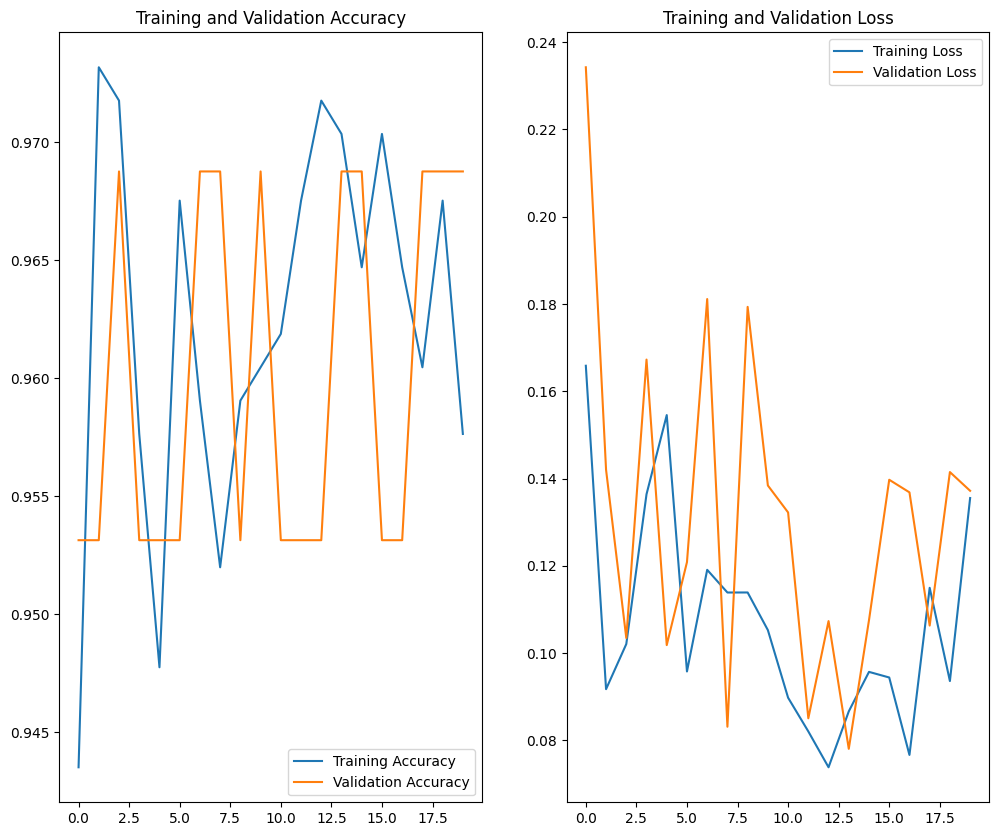

In [ ]:
plt.figure(figsize=(12,10))
plt.subplot(1, 2, 1)
plt.plot(range(20), acc, label='Training Accuracy')
plt.plot(range(20), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(20), loss, label='Training Loss')
plt.plot(range(20), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [37]:
# Convert the dataset to NumPy arrays
test_images = []
test_labels = []
for images, labels in data:
    test_images.append(images.numpy())
    test_labels.append(labels.numpy())
test_images = tf.concat(test_images, axis=0)
test_labels = tf.concat(test_labels, axis=0)

In [ ]:
# Perform evaluation
predictions = model.predict(test_images)
predicted_labels = tf.argmax(predictions, axis=1).numpy()
true_labels = test_labels.numpy()

29/29 [==============================] - 4s 142ms/step


### Results 

In [ ]:
# Printing the accuracy
accuracy = tf.keras.metrics.Accuracy()
accuracy.update_state(true_labels, predicted_labels)
print("Accuracy:", accuracy.result().numpy()*100,'%')


Accuracy: 95.55555582046509 %


In [ ]:
# Printing F1 Score (Micro) and F1 Score (Macro)
f1_micro = f1_score(true_labels, predicted_labels, average='micro')
f1_macro = f1_score(true_labels, predicted_labels, average='macro')
print("F1 Score (micro):", f1_micro*100,'%')
print("F1 Score (macro):", f1_macro*100,'%')


F1 Score (micro): 95.55555555555556 %
F1 Score (macro): 95.53106595692347 %


###Run prediction on a sample images

In [ ]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 27ms/step


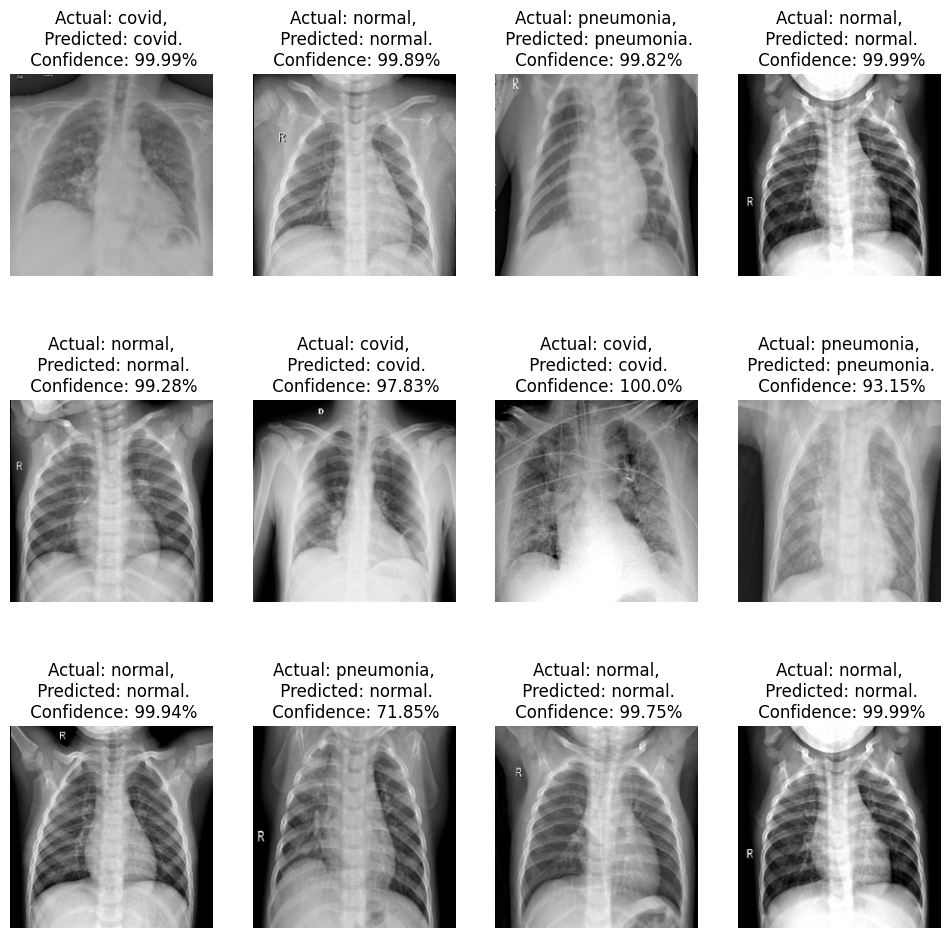

In [ ]:
plt.figure(figsize=(12, 12))
for images, labels in test_ds.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

In [ ]:
import os
model_version =([int (i) for i in os.listdir("/content/drive/MyDrive/Expand AI Machine Learning Assignment/Computer Vision/models")])
model.save(f"/content/drive/MyDrive/Expand AI Machine Learning Assignment/Computer Vision/models{model_version}")